In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
df = pd.read_csv('LunarLanderData.csv')
X = df.drop(columns='ACT', axis=1).values
y = df.loc[:,'ACT']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CX      1803 non-null   float64
 1   CY      1803 non-null   float64
 2   LVX     1803 non-null   float64
 3   LVY     1803 non-null   float64
 4   ANG     1803 non-null   float64
 5   AV      1803 non-null   float64
 6   LG      1803 non-null   float64
 7   RG      1803 non-null   float64
 8   ACT     1803 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 126.9 KB


In [3]:
X_tra, X_test, y_tra, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=0, 
    max_depth=8
) 

In [5]:
model = dt.fit(X_tra, y_tra)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(f'test accuracy={acc}')

test accuracy=0.6786703601108033


In [6]:
features = [
    'coordinates x',  # coordinates of the lander in x
    'coordinates y',  # coordinates of the lander in y
    'velocities x',  # linear velocities in x
    'velocities y',  # linear velocities in y
    'angle',  # angle
    'angular velocity',  # angular velocity
    'left leg ground',  # left leg contact with the ground
    'right leg ground'  # right leg contact with the ground
]
r = export_text(model, feature_names=features, decimals=5) 
print(r)

|--- left leg ground <= 0.50000
|   |--- velocities y <= -0.23502
|   |   |--- angular velocity <= -0.01190
|   |   |   |--- velocities y <= -0.28834
|   |   |   |   |--- angle <= 0.22811
|   |   |   |   |   |--- velocities x <= -0.55316
|   |   |   |   |   |   |--- coordinates x <= -0.07696
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- coordinates x >  -0.07696
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- velocities x >  -0.55316
|   |   |   |   |   |   |--- angular velocity <= -0.02736
|   |   |   |   |   |   |   |--- coordinates y <= 1.26076
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- coordinates y >  1.26076
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- angular velocity >  -0.02736
|   |   |   |   |   |   |   |--- velocities x <= -0.12300
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- velocities x >  -0.12300
|   |   |   |   |   |   |   |   

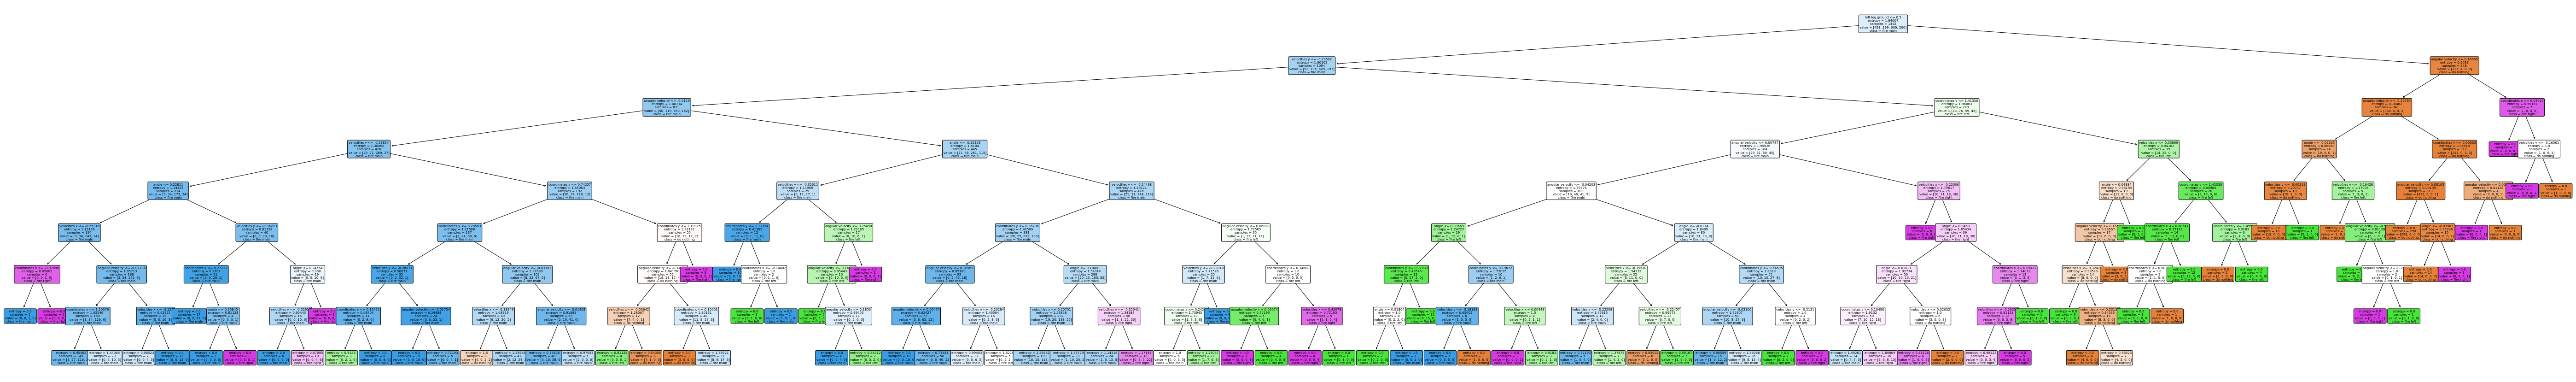

In [7]:
classes = [
    'do nothing', 
    'fire left',  # fire left orientation engine
    'fire main',  # fire main engine
    'fire right'  # fire right orientation engine
]
plt.figure(figsize=(100,15))
tree.plot_tree(
    model, 
    feature_names=features, 
    class_names=classes, 
    rounded=True, 
    fontsize=7, 
    precision=5, 
    filled=True
)
plt.savefig('LunarLanderTree.png')
plt.show()

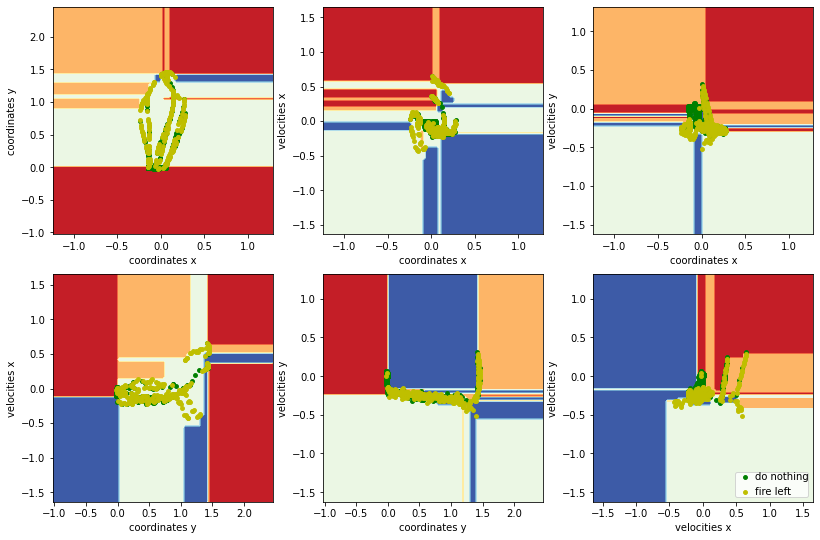

In [8]:
# Parameters
n_classes = 2
plot_colors = "gy"
# plot_step = 0.02
plt.figure(figsize=(12,8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X_ = X[:, pair]

    # Train
    clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=8).fit(X_, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=features[pair[0]],
        ylabel=features[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X_[idx, 0],
            X_[idx, 1],
            c=color,
            label=classes[i],
            cmap=plt.cm.RdYlBu,
#             edgecolor="black",
            s=15,
        )

# plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")